In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv, pickle
from sklearn import metrics
from scipy import special, interpolate

In [10]:
def roc():
        
    t_score = np.array([])
    t_label = np.array([])
    
    #Score
    csv_file = open('./Statistics/rf-statistic.csv','r')
    reader = csv.reader(csv_file, delimiter=' ', quotechar='|')
    for row in reader:
        t_score = np.append(t_score, float(row[0]))
    csv_file.close()
    
    for i in range(len(t_score)):
        if i%2 == 0:
            t_label = np.append(t_label, 0)
        else:
            t_label = np.append(t_label, 1)
    
    t_fpr, t_tpr, t_thresh = metrics.roc_curve(t_label[2000:], t_score[2000:], pos_label=1)
    t_auc = metrics.roc_auc_score(t_label, t_score)
      
    plt.figure()
    lw = 2
    plt.plot(t_fpr, t_tpr, color='darkorange', lw=lw, label='TNN (AUC = %0.2f)' % t_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    
    powers = np.array([])
    f = interpolate.interp1d(t_fpr, t_tpr)
    powers = np.append(powers, f(0.175))
    
    return powers

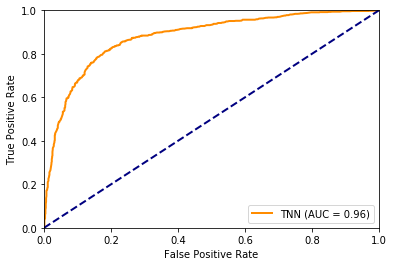

array([0.799])

In [13]:
roc()